In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/orchid"

In [ ]:
%cd /content/drive/MyDrive/orchid

/content/drive/MyDrive/orchid


In [ ]:
!ls  

dataset  kaggle.json  test  train  validation


In [ ]:
!kaggle datasets download -d mikful/orchids

100% 1.07G/1.07G [00:12<00:00, 81.2MB/s]
100% 1.07G/1.07G [00:12<00:00, 93.9MB/s]


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
!ls  

In [ ]:
base_dir = "/content/drive/My Drive/orchid"

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

anggraecum_train_dir = os.path.join(train_dir, 'Anggraecum')
brassavola_train_dir = os.path.join(train_dir, 'Brassavola')

anggraecum_val_dir = os.path.join(val_dir, 'Anggraecum')
brassavola_val_dir = os.path.join(val_dir, 'Brassavola')

In [ ]:
print('total training angraecum images :', len(os.listdir(anggraecum_train_dir)))
print('total training brassavola images :', len(os.listdir(brassavola_train_dir)))

print('\ntotal val angraecum images :', len(os.listdir(anggraecum_val_dir)))
print('total val brassavola images :', len(os.listdir(brassavola_val_dir)))

total training angraecum images : 108
total training brassavola images : 250

total val angraecum images : 222
total val brassavola images : 279


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data test
val_data = []
val_label = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (100,100))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [ ]:
# Tampilkan shape dari data train, data val dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("val Data = ", val_data.shape)
print("val Label = ", val_label.shape)

Train Data =  (334, 100, 100, 3)
Train Label =  (334,)
val Data =  (457, 100, 100, 3)
val Label =  (457,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [53 53 29]
Data setelah di-normalisasi  [0.20784314 0.20784314 0.11372549]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[1:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[1:1005])

Label sebelum di-encoder  ['Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecum'
 'Anggraecum' 'Anggraecum' 'Anggraecum' 'Anggraecu

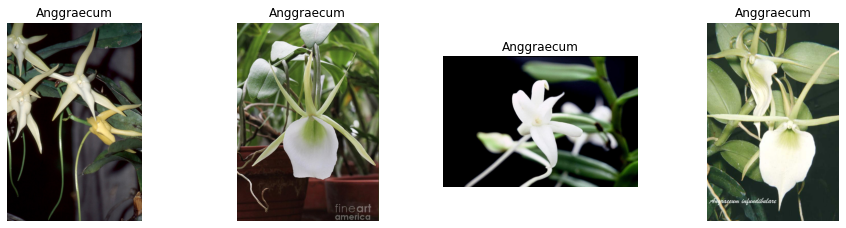

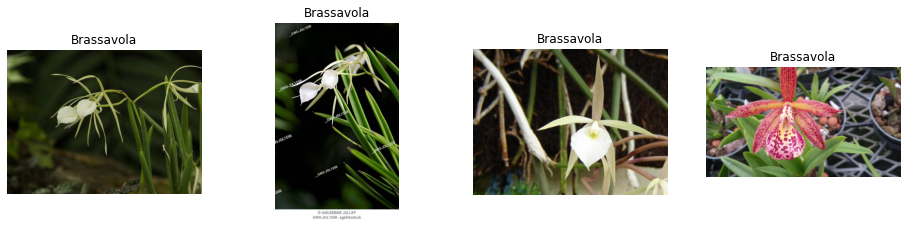

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

anggraecum_images = os.listdir(anggraecum_train_dir)
brassavola_images = os.listdir(brassavola_train_dir)

fname1 = [os.path.join(anggraecum_train_dir,fname)
        for fname in anggraecum_images[:4]]

fname2 = [os.path.join(brassavola_train_dir,fname)
        for fname in brassavola_images[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Anggraecum')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Brassavola')
    plt.imshow(img)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(InputLayer(input_shape=[100,100,3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 128)      0         
 2D)                                                             
                                                        

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
11/11 [==============================] - 12s 161ms/step - loss: 1.0305 - acc: 0.6796 - val_loss: 0.7189 - val_acc: 0.5864
Epoch 2/100
11/11 [==============================] - 1s 82ms/step - loss: 0.7182 - acc: 0.7485 - val_loss: 0.7062 - val_acc: 0.4967
Epoch 3/100
11/11 [==============================] - 1s 83ms/step - loss: 0.3888 - acc: 0.8533 - val_loss: 0.7254 - val_acc: 0.5514
Epoch 4/100
11/11 [==============================] - 1s 82ms/step - loss: 0.2276 - acc: 0.9341 - val_loss: 0.6960 - val_acc: 0.5602
Epoch 5/100
11/11 [==============================] - 1s 82ms/step - loss: 0.1473 - acc: 0.9581 - val_loss: 1.3008 - val_acc: 0.5580
Epoch 6/100
11/11 [==============================] - 1s 82ms/step - loss: 0.1258 - acc: 0.9701 - val_loss: 1.9797 - val_acc: 0.5514
Epoch 7/100
11/11 [==============================] - 1s 82ms/step - loss: 0.1071 - acc: 0.9760 - val_loss: 4.0907 - val_acc: 0.5514
Epoch 8/100
11/11 [==============================] - 1s 82ms/step - loss: 

In [ ]:
target_dir = "/content/drive/MyDrive/TKC"
model.save(target_dir + '/model.h5')

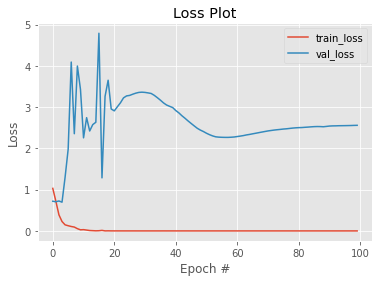

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

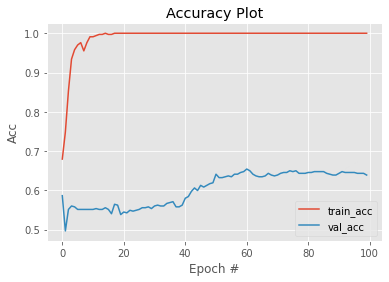

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.8).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61       205
           1       0.68      0.66      0.67       252

    accuracy                           0.64       457
   macro avg       0.64      0.64      0.64       457
weighted avg       0.64      0.64      0.64       457

